# 2 Hypothesis testing - comparing the mean of 2 groups
Run a t-test to compare whether the average monthly return of AAPL is greater than the average monthly returns of MSFT

In [1]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np

H0 : mean(r_AAPL) > mean(r_MSFT)  ==>  H0: mean(r_AAPL) - mean(r_MSFT) = 0
Ha: mean(r_AAPL) < mean(r_MSFT)   ==>  Ha: mean(r_AAPL) - mean(r_MSFT) != 0

VARIABLE OF STUDY = DIFFERENCE OF BOTH MEAN RETURNS
dif = mean(r_AAPL) - mean(r_MSFT)
H0: dif = 0
Ha: dif != 0

## AAPL

In [2]:

# Collecting the real data from returns of AAPL from July 2019 until July 2022 monthly (60 months)
AAPL = pdr.get_data_yahoo("AAPL", start = "2017-07-01", end = "2022-05-31", interval = "m")
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-01,176.649994,152.000000,174.009995,165.119995,1.627516e+09,164.439545
2022-03-01,179.610001,150.100006,164.699997,174.610001,2.180800e+09,174.111984
2022-04-01,178.490005,155.380005,174.029999,157.649994,1.687796e+09,157.200348
2022-05-01,166.479996,132.610001,156.710007,148.839996,2.401040e+09,148.415482
2022-06-01,151.740005,129.039993,149.899994,136.720001,1.749100e+09,136.530350


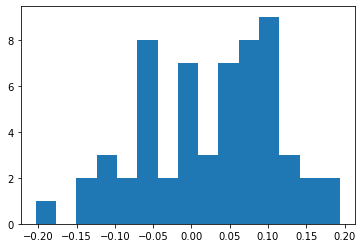

In [3]:
# Calculating the monthly cc returns
AAPL["r"] = (np.log(AAPL["Adj Close"]) - np.log(AAPL["Adj Close"].shift(1)))
# Plotting the cc returns
plt.hist(AAPL['r'], bins=15)
plt.show()

In [4]:
# We calculate the mean of the cc returns
AAPL_mean = AAPL['r'].mean()
AAPL_mean

0.022998402961812832

In [5]:
# We calculate the std of the group
AAPL_std = AAPL['r'].std() / np.sqrt(AAPL["r"].count())
AAPL_std

0.011317977210881281

## MSFT

In [6]:
# Collecting the real data from returns of MSFT from July 2019 until July 2022 monthly
MSFT = pdr.get_data_yahoo("MSFT", start = "2017-07-01", end = "2022-05-31", interval = "m")
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-01,315.119995,271.519989,310.410004,298.790009,697050600.0,297.480591
2022-03-01,315.950012,270.000000,296.399994,308.309998,734334200.0,307.593567
2022-04-01,315.109985,270.000000,309.369995,277.519989,627343400.0,276.875122
2022-05-01,290.880005,246.440002,277.709991,271.869995,742902000.0,271.238251
2022-06-01,277.690002,241.509995,275.200012,256.829987,621372300.0,256.829987


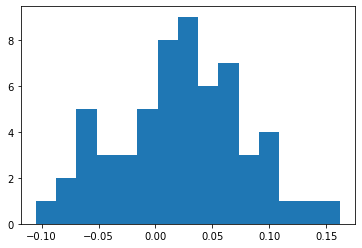

In [7]:
# Calculating the monthly cc returns
MSFT["r"] = np.log(MSFT["Adj Close"]) - np.log(MSFT["Adj Close"].shift(1))
# Plotting the cc returns
plt.hist(MSFT["r"], bins = 15)
plt.show()

In [8]:
# Calculating the mean of the cc returns
MSFT_mean = MSFT["r"].mean()
MSFT_mean

0.022500243009746842

In [9]:
# Calculating the standard deviation of the cc returns
MSFT_std = MSFT["r"].std() / np.sqrt(MSFT["r"].count())
MSFT_std

0.007412904038986073

## Calculating the t-statistic

t = ((mean(r_AAPL) - mean(r_MSFT) - 0) / se  => Remember that the standard error is the standard deviation of the variable of study.

Then:
t = ((mean(r_AAPL) - mean(r_MSFT) - 0) / SD(mean(r_APPL) - mean(r_MSFT)) => The standard deviation can be calculated with the squared root of the variance of this difference

Then:
t = ((mean(r_AAPL) - mean(r_MSFT) - 0) / sqrt((1/N)(Var(r_AAPL) + Var(r_MSFT)))

In [10]:
# Calculating the t-statisitc
t = (AAPL_mean - MSFT_mean -0) / np.sqrt((1 / MSFT["r"].count()) * (AAPL_std**2 + MSFT_std**2))
t

0.2828216254875307

SINCE THE RESULT OF THE T-STATISTIC IS THAT THE DIFFERENCE BETWEEN THE TOW MEANS IS 0.28 STANDARD DEVIATIONS, WE CANNOT DETERMINE THAT NEITHER OF THE HYPOTHESIS ARE CONFIRMED. 

# 3 Measures of linear relationship
 Imagine we want to see whether there is a relationship between the OIL price and the Microsoft stock price. The S&P500 is an index that represents the 500 bigest US companies, which is a good representation of the US financial market. We will use monthly data for the last 3-4 years.

In [11]:
import pandas as pd
import yfinance as yf

In [12]:
# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


Unfortunately, the range of stock prices and market indexes can vary a lot, so this makes difficult to compare price movements in one plot. For example, if we plot the MSFT prices and the S&P500:

<Figure size 432x288 with 0 Axes>

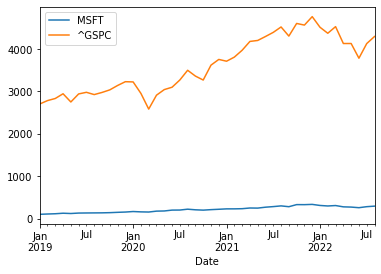

In [13]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()



It looks like the GSPC has had a better performance, but this is misleading since both investment have different range of prices.

When comparing the performance of 2 or more stock prices and/or indexes, it is a good idea to generate an index for each series, so that we can emulate how much $1.00 invested in each stock/index would have moved over time. We can divide the stock price of any month by the stock price of the first month to get a growth factor:

In [14]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]
print(adjprices['iGSPC'].head(), adjprices['iMSFT'].head())

Date
2019-01-01    1.000000
2019-02-01    1.029729
2019-03-01    1.048186
2019-04-01    1.089394
2019-05-01    1.017736
Name: iGSPC, dtype: float64 Date
2019-01-01    1.000000
2019-02-01    1.072776
2019-03-01    1.134192
2019-04-01    1.255940
2019-05-01    1.189392
Name: iMSFT, dtype: float64


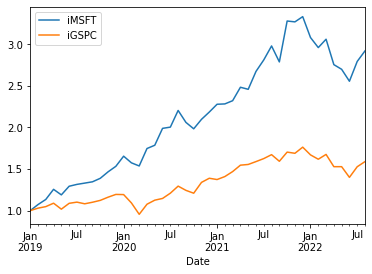

In [15]:
# Plotting the 2 new indexes over timeplt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

Now we calculate continuously compounded monthly returns. With pandas most of the data management functions works row-wise. In other words, operations are performed to all columns by row:

In [16]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083538,0.066658


GSPC stands for Global Standard & Poors Composite, which is the S&P500 index. We start with a scatter plot to see whether there is a linear relationship between the MSFT returns and the GSPC returns:

<Figure size 432x288 with 0 Axes>

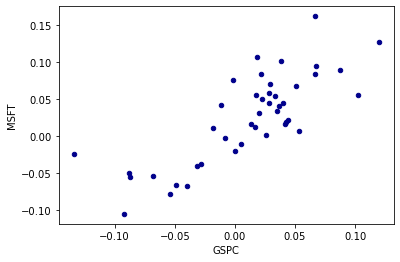

In [17]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

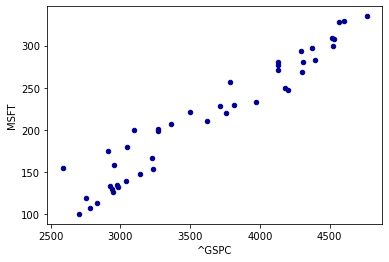

In [18]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

### 3.1 Covariance

In [19]:
# Calculating the covariance
cov_r = r.cov()
print("Covariance cc returns of MSFT and GSPC: ", cov_r)
cov_adj_prices = adjprices.cov()
print("Covariance adjusted prices of MSFT and GSPC: ", cov_adj_prices)

Covariance cc returns of MSFT and GSPC:            MSFT      GSPC
MSFT  0.003555  0.002523
GSPC  0.002523  0.002853
Covariance adjusted prices of MSFT and GSPC:                 MSFT          ^GSPC       iMSFT       iGSPC
MSFT    4914.130961   44739.327859   48.877064   16.544997
^GSPC  44739.327859  436898.124324  444.987524  161.568769
iMSFT     48.877064     444.987524    0.486142    0.164560
iGSPC     16.544997     161.568769    0.164560    0.059750


### 3.2 Correlation

In [20]:
# Calculating the correlation
corr_r = np.corrcoef(r["MSFT"], r["GSPC"])
print("Correlation cc returns of MSFT and GSPC: ", corr_r[0][1])
corr_adj_prices = np.corrcoef(adjprices["MSFT"], adjprices["^GSPC"])
print("Correlation adjusted prices of MSFT and GSPC: ", corr_adj_prices[0][1])

Correlation cc returns of MSFT and GSPC:  0.7922973632030229
Correlation adjusted prices of MSFT and GSPC:  0.9655527430084401
